# Chicago Car Crashes Project

**Build a model to predict the severity of a traffic crashes.**

# Importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loading Data

Using the data from "Chicago Car Crash Dataset".
The dataset can be found here:
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

In [2]:
#loading the data into dataframe using pandas
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

C:\Users\vijay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#checking the shape of dataframe
df.shape

(475553, 49)

In [4]:
#printing the first five rows of dataframe
df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/10/2019 06:16:00 PM,IMPROPER BACKING,UNABLE TO DETERMINE,2158,N,MARMORA AVE,2515.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",06/30/2017 04:01:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,8301,S,CICERO AVE,834.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/10/2020 10:25:00 AM,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO YIELD RIGHT-OF-WAY,1632,E,67TH ST,331.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,$500 OR LESS,07/11/2020 08:30:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,110,E,51ST ST,224.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DRIVEWAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/08/2020 02:15:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,412,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [5]:
#checking the datatype of columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475553 entries, 0 to 475552
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                475553 non-null  object 
 1   RD_NO                          471829 non-null  object 
 2   CRASH_DATE_EST_I               35549 non-null   object 
 3   CRASH_DATE                     475553 non-null  object 
 4   POSTED_SPEED_LIMIT             475553 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         475553 non-null  object 
 6   DEVICE_CONDITION               475553 non-null  object 
 7   WEATHER_CONDITION              475553 non-null  object 
 8   LIGHTING_CONDITION             475553 non-null  object 
 9   FIRST_CRASH_TYPE               475553 non-null  object 
 10  TRAFFICWAY_TYPE                475553 non-null  object 
 11  LANE_CNT                       198963 non-null  float64
 12  ALIGNMENT                     

Looking at the information above , there are 32 object type columns that need to be
taken care and also need to handle the missing values.

**Columns of the dataset represents:**

- **CRASH_RECORD_ID**  : A unique ID can be used to link to the same crash in the Vehicles                                     and people datasets. 
- **RD_NO**:             Chicago Police Department report number. 
- **CRASH_DATE_EST_I** : Crash date estimated by desk officer or reporting party.
- **CRASH_DATE** :       Date and time of crash.
- **POSTED_SPEED_LIMIT**:Posted speed limit.
- **TRAFFIC_CONTROL_DEVICE**:Traffic control device present at crash location.
- **DEVICE_CONDITION**  : Condition of traffic control device.
- **WEATHER_CONDITION** : Weather condition at time of crash.
- **LIGHTING_CONDITION**: Light condition at time of crasH.
- **FIRST_CRASH_TYPE**  : Type of first collision in crash.
- **TRAFFICWAY_TYPE**   : Trafficway type.
- **LANE_CNT**          : Total number of through lanes in either direction, excluding turn lanes.
- **ALIGNMENT**         : Street alignment at crash location.
- **ROADWAY_SURFACE_COND**:Road surface condition.
- **ROAD_DEFECT**       : Road defects.
- **REPORT_TYPE**       : Administrative report type (at scene, at desk, amended).
- **CRASH_TYPE**        : A general severity classification for the crash. Can be either Injury  
and/or Tow Due to Crash or No Injury / Drive Away.
- **INTERSECTION_RELATED_I**:A field observation by the police officer whether an intersection played a role in the crash. Does not represent whether or not the crash occurred within the intersection.
- **NOT_RIGHT_OF_WAY_I**  :Whether the crash begun or first contact was made outside of the public 
right-of-way.
- **HIT_AND_RUN_I**      : Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid.
- **DAMAGE**             : A field observation of estimated damage.
- **DATE_POLICE_NOTIFIED**: Calendar date on which police were notified of the crash.
- **PRIM_CONTRIBUTORY_CAUSE**:The factor which was most significant in causing the crash.
- **SEC_CONTRIBUTORY_CAUSE** :The factor which was second most significant in causing the crash.
- **STREET_NO**            :Street address number of crash location.
- **STREET_DIRECTION**     :Street address direction (N,E,S,W) of crash location.
- **STREET_NAME**          :Street address name of crash location.
- **BEAT_OF_OCCURRENCE**   :Chicago Police Department Beat ID.
- **PHOTOS_TAKEN_I**       :Whether the Chicago Police Department took photos at the location of the 
crash.
- **STATEMENTS_TAKEN_I**   :Whether statements were taken from unit(s) involved in crash.
- **DOORING_I**            :Whether crash involved a motor vehicle occupant opening a door into the 
travel path of a bicyclist, causing a crash.
- **WORK_ZONE_I**          :Whether the crash occurred in an active work zone.
- **WORK_ZONE_TYPE**       :The type of work zone.           
- **WORKERS_PRESENT_I**    :Whether construction workers were present in an active work zone at crash                             location
- **NUM_UNITS**            :Number of units involved in the crash. 
- **MOST_SEVERE_INJURY**   :Most severe injury sustained by any person involved in the crash.
- **INJURIES_TOTAL**       :Total persons sustaining fatal, incapacitating, non-incapacitating, and possible injuries.
- **INJURIES_FATAL**       :Total persons sustaining fatal injuries in the crash.
- **INJURIES_INCAPACITATING**:Total persons sustaining incapacitating/serious injuries in the crash.  - **INJURIES_NON_INCAPACITATING**:Total persons sustaining non-incapacitating injuries in the crash. -**INJURIES_REPORTED_NOT_EVIDENT**:Total persons sustaining possible injuries in the crash.       
- **INJURIES_NO_INDICATION**:Total persons sustaining no injuries in the crash.
- **INJURIES_UNKNOWN**      :Total persons for whom injuries sustained, if any, are unknown.         

- **CRASH_HOUR**            :The hour of the day component of CRASH_DATE. 
- **CRASH_DAY_OF_WEEK**     :The day of the week component of CRASH_DATE. Sunday=1                
- **CRASH_MONTH**           :The month component of CRASH_DATE.                
- **LATITUDE**              :The latitude of the crash location.             
- **LONGITUDE**             :The longitude of the crash location.            
- **LOCATION**              :The crash location.          

# Scrubing the Data

In [6]:
#checking for the null values
df.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              3724
CRASH_DATE_EST_I                 440004
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         276590
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       11512
CRASH_TYPE                            0
INTERSECTION_RELATED_I           368062
NOT_RIGHT_OF_WAY_I               453223
HIT_AND_RUN_I                    336276
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


Noticed null values over 400000 in columns PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I, DOORING_I,              WORK_ZONE_I, WORK_ZONE_TYPE, WORKERS_PRESENT_I and NOT_RIGHT_OF_WAY_I.            

# Choosing the Target variable

In [7]:
#checking the value counts
df['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              358333
INJURY AND / OR TOW DUE TO CRASH    117220
Name: CRASH_TYPE, dtype: int64

- Target variable is the 'CRASH_TYPE' column which will be renamed 'SEVERE'.
- The severity of the crash will be determined on whether or not their is an injury / a car being towed.
- This column will be a binary column with 0 representing no injury and 1 representing an injury.

In [8]:
df.rename(columns = {'CRASH_TYPE': 'SEVERE'}, inplace = True)
df['SEVERE'] = df['SEVERE'].map(lambda x:1 if x == 'INJURY AND / OR TOW DUE TO CRASH' else 0)

In [9]:
df['SEVERE'].value_counts()

0    358333
1    117220
Name: SEVERE, dtype: int64

**Changing the datatype of the 'CRASH_DATE' column from object to date.**

In [10]:
df['CRASH_DATE'] = pd.to_datetime(df.CRASH_DATE)

In [11]:
df.head(2)

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,SEVERE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,2019-07-10 17:56:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,0,NaN,NaN,NaN,"OVER $1,500",07/10/2019 06:16:00 PM,IMPROPER BACKING,UNABLE TO DETERMINE,2158,N,MARMORA AVE,2515.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,2017-06-30 16:00:00,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,1,Y,NaN,NaN,"OVER $1,500",06/30/2017 04:01:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,8301,S,CICERO AVE,834.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)


**Checking the value counts of multiple columns using for loop** 

In [12]:
# finding value_counts of columns using for loop
columns=['INTERSECTION_RELATED_I','ALIGNMENT','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I',
         'WORK_ZONE_I','MOST_SEVERE_INJURY','FIRST_CRASH_TYPE','PRIM_CONTRIBUTORY_CAUSE']
for i in columns:
    print(df[i].value_counts())
    print('_________________________________________________________________')

Y    102421
N      5070
Name: INTERSECTION_RELATED_I, dtype: int64
_________________________________________________________________
STRAIGHT AND LEVEL       463555
STRAIGHT ON GRADE          5895
CURVE, LEVEL               3671
STRAIGHT ON HILLCREST      1484
CURVE ON GRADE              714
CURVE ON HILLCREST          234
Name: ALIGNMENT, dtype: int64
_________________________________________________________________
Y    20381
N     1949
Name: NOT_RIGHT_OF_WAY_I, dtype: int64
_________________________________________________________________
Y    133188
N      6089
Name: HIT_AND_RUN_I, dtype: int64
_________________________________________________________________
Y    2450
N     652
Name: WORK_ZONE_I, dtype: int64
_________________________________________________________________
NO INDICATION OF INJURY     413464
NONINCAPACITATING INJURY     33832
REPORTED, NOT EVIDENT        19064
INCAPACITATING INJURY         7759
FATAL                          467
Name: MOST_SEVERE_INJURY, dtype: in

**Changing the column values to binary i.e(0 or 1) instead of (Y or N) using the lambda
function in columns INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I and
WORK_ZONE_I.**

In [13]:
#lambda fuction to change values to binary
df['INTERSECTION_RELATED_I'] = df['INTERSECTION_RELATED_I'].map(lambda x: 1 if x=='Y' else 0)
df['NOT_RIGHT_OF_WAY_I'] = df['NOT_RIGHT_OF_WAY_I'].map(lambda x:1 if x=='Y' else 0)
df['HIT_AND_RUN_I'] =df['HIT_AND_RUN_I'].map(lambda x:1 if x=='Y' else 0)

In [14]:
#replacing null values with 0 and lambda function to convert values to binary
df['WORK_ZONE_I'].fillna(0, inplace=True)
df['WORK_ZONE_I'] =df['WORK_ZONE_I'].map(lambda x:1 if x=='Y' else 0)

**Replacing null values with 0 in multiple columns using for loop**

In [15]:
#filling nu
col=['INJURIES_TOTAL','INJURIES_FATAL','INJURIES_INCAPACITATING',
     'INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT',
     'INJURIES_NO_INDICATION','LANE_CNT' ]
for i in col:
    df[i].fillna(0, inplace=True)

**Dropping the inconclusive columns**

In [16]:
#dropping the columns which are inconclusive
drop_list = ['CRASH_DATE_EST_I', 'RD_NO','REPORT_TYPE','DATE_POLICE_NOTIFIED', 
             'STREET_DIRECTION', 'BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I', 
             'DOORING_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I','LATITUDE', 
             'LONGITUDE','CRASH_RECORD_ID','INJURIES_UNKNOWN','STREET_NO',
             'MOST_SEVERE_INJURY','SEC_CONTRIBUTORY_CAUSE','LOCATION','STREET_NAME']
df.drop(columns = drop_list, inplace = True)

In [17]:
#printing the shape of dataframe after droppin the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475553 entries, 0 to 475552
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_DATE                     475553 non-null  datetime64[ns]
 1   POSTED_SPEED_LIMIT             475553 non-null  int64         
 2   TRAFFIC_CONTROL_DEVICE         475553 non-null  object        
 3   DEVICE_CONDITION               475553 non-null  object        
 4   WEATHER_CONDITION              475553 non-null  object        
 5   LIGHTING_CONDITION             475553 non-null  object        
 6   FIRST_CRASH_TYPE               475553 non-null  object        
 7   TRAFFICWAY_TYPE                475553 non-null  object        
 8   LANE_CNT                       475553 non-null  float64       
 9   ALIGNMENT                      475553 non-null  object        
 10  ROADWAY_SURFACE_COND           475553 non-null  object        
 11  

**Capped the continuous values of the column 'INJURIES_NO_INDICATION ' greater than 7
 assigned to 7**

In [18]:
#capped to 7
print(df['INJURIES_NO_INDICATION'].value_counts())
df['INJURIES_NO_INDICATION'].values[df['INJURIES_NO_INDICATION'] > 7] =7
print(df['INJURIES_NO_INDICATION'].value_counts())

2.0     222564
1.0     141725
3.0      61269
4.0      23295
5.0       9776
0.0       9736
6.0       4158
7.0       1579
8.0        715
9.0        302
10.0       153
11.0        72
12.0        42
14.0        28
13.0        28
16.0        16
15.0        14
17.0        10
20.0         9
21.0         6
30.0         5
37.0         5
18.0         4
26.0         4
27.0         4
19.0         4
22.0         4
31.0         3
36.0         3
42.0         3
40.0         2
29.0         2
24.0         2
28.0         2
38.0         1
25.0         1
46.0         1
34.0         1
50.0         1
33.0         1
32.0         1
61.0         1
39.0         1
Name: INJURIES_NO_INDICATION, dtype: int64
2.0    222564
1.0    141725
3.0     61269
4.0     23295
5.0      9776
0.0      9736
6.0      4158
7.0      3030
Name: INJURIES_NO_INDICATION, dtype: int64


**Capped the continuous values of the column 'NUM_UNITS' greater than 6
 assigned to 6**

In [19]:
# capped at 6
print(df['NUM_UNITS'].value_counts())
df['NUM_UNITS'].values[df['NUM_UNITS'] > 6] = 6
print(df['NUM_UNITS'].value_counts())

2     418363
1      25445
3      25319
4       4767
5       1116
6        335
7        120
8         41
9         26
10        10
11         5
12         2
18         1
16         1
15         1
14         1
Name: NUM_UNITS, dtype: int64
2    418363
1     25445
3     25319
4      4767
5      1116
6       543
Name: NUM_UNITS, dtype: int64


**Capped the continuous values of the column 'INJURIES_TOTAL' greater than 5
 assigned to 5**

In [20]:
#capped to 5
print(df['INJURIES_TOTAL'].value_counts())
df['INJURIES_TOTAL'].values[df['INJURIES_TOTAL'] > 5] = 5
print(df['INJURIES_TOTAL'].value_counts())

0.0     414431
1.0      46295
2.0       9998
3.0       3053
4.0       1086
5.0        409
6.0        160
7.0         60
8.0         20
9.0         14
10.0         9
15.0         5
11.0         5
12.0         2
13.0         2
21.0         2
16.0         1
19.0         1
Name: INJURIES_TOTAL, dtype: int64
0.0    414431
1.0     46295
2.0      9998
3.0      3053
4.0      1086
5.0       690
Name: INJURIES_TOTAL, dtype: int64


**Merging and replacing the values of the column WEATHER_CONDITION to reduced the categorical values in the column.**
- UNKNOWN and OTHER to UNKNOWN/OTHER
- FREEZING RAIN/DRIZZLE to SLEET/HAIL
- BLOWING SNOW to SNOW
- SEVERE CROSS WIND GATE to CLOUDY/OVERCAST
- BLOWING SAND, SOIL, DIRT to UNKNOWN/OTHER

In [21]:
#printing the value counts
df['WEATHER_CONDITION'].value_counts()

CLEAR                       376055
RAIN                         42732
UNKNOWN                      20639
SNOW                         18052
CLOUDY/OVERCAST              14273
OTHER                         1508
FOG/SMOKE/HAZE                 818
SLEET/HAIL                     701
FREEZING RAIN/DRIZZLE          555
BLOWING SNOW                   120
SEVERE CROSS WIND GATE          98
BLOWING SAND, SOIL, DIRT         2
Name: WEATHER_CONDITION, dtype: int64

In [22]:
#merging the values  and printing the value counts after merge
df['WEATHER_CONDITION'] = df['WEATHER_CONDITION'].replace({'UNKNOWN':'UNKNOWN/OTHER','OTHER':'UNKNOWN/OTHER',
                                                     'FREEZING RAIN/DRIZZLE': 'SLEET/HAIL',
                                                     'BLOWING SNOW': 'SNOW',
                                                      'SEVERE CROSS WIND GATE': 'CLOUDY/OVERCAST',
                                                     'BLOWING SAND, SOIL, DIRT': 'UNKNOWN/OTHER'})
df['WEATHER_CONDITION'].value_counts()

CLEAR              376055
RAIN                42732
UNKNOWN/OTHER       22149
SNOW                18172
CLOUDY/OVERCAST     14371
SLEET/HAIL           1256
FOG/SMOKE/HAZE        818
Name: WEATHER_CONDITION, dtype: int64

**Merging and replacing the values of the column 'ROADWAY_SURFACE_COND'  to reduced the categorical values in the column.**
- UNKNOWN  - UNKNOWN/OTHER
- OTHER    - UNKNOWN/OTHER
- SAND, MUD, DIRT - UNKNOWN/OTHER
- ICE   -  SNOW OR SLUSH

In [23]:
#printing the value_counts
df['ROADWAY_SURFACE_COND'].value_counts()

DRY                355877
WET                 65685
UNKNOWN             31407
SNOW OR SLUSH       17521
ICE                  3730
OTHER                1118
SAND, MUD, DIRT       215
Name: ROADWAY_SURFACE_COND, dtype: int64

In [24]:
#merging the values and printing the new value counts
df['ROADWAY_SURFACE_COND'] =df['ROADWAY_SURFACE_COND'].replace({'UNKNOWN':'UNKNOWN/OTHER',
                                                                 'OTHER':'UNKNOWN/OTHER',
                                                               'SAND, MUD, DIRT': 'UNKNOWN/OTHER',
                                                                 'ICE': 'SNOW OR SLUSH'})
df['ROADWAY_SURFACE_COND'].value_counts()

DRY              355877
WET               65685
UNKNOWN/OTHER     32740
SNOW OR SLUSH     21251
Name: ROADWAY_SURFACE_COND, dtype: int64

**Merging and replacing the values of the column 'TRAFFIC_CONTROL_DEVICE'  to reduced the categorical values in the column.**
- UNKNOWN - UNKNOWN/OTHER
- OTHER - UNKNOWN/OTHER
- FLASHING CONTROL SIGNAL- STOP SIGN/FLASHER
- OTHER RAILROAD CROSSING - RAILROAD CROSSING GATE

In [25]:
#printing value_counts
df['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                 273353
TRAFFIC SIGNAL              132591
STOP SIGN/FLASHER            47224
UNKNOWN                      15355
OTHER                         2913
LANE USE MARKING              1226
YIELD                          683
OTHER REG. SIGN                467
OTHER WARNING SIGN             414
RAILROAD CROSSING GATE         313
PEDESTRIAN CROSSING SIGN       206
POLICE/FLAGMAN                 181
SCHOOL ZONE                    168
DELINEATORS                    142
FLASHING CONTROL SIGNAL        131
OTHER RAILROAD CROSSING        110
RR CROSSING SIGN                41
NO PASSING                      21
BICYCLE CROSSING SIGN           14
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [26]:
#merging and replacing values, printing the new value counts
df['TRAFFIC_CONTROL_DEVICE']=df['TRAFFIC_CONTROL_DEVICE'].replace(
                            {'UNKNOWN':'UNKNOWN/OTHER',
                            'OTHER':'UNKNOWN/OTHER',
                            'FLASHING CONTROL SIGNAL':'STOP SIGN/FALSHER',
                              'OTHER RAILROAD CROSSING':'RAILROAD CROSSING GATE'})
df['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                 273353
TRAFFIC SIGNAL              132591
STOP SIGN/FLASHER            47224
UNKNOWN/OTHER                18268
LANE USE MARKING              1226
YIELD                          683
OTHER REG. SIGN                467
RAILROAD CROSSING GATE         423
OTHER WARNING SIGN             414
PEDESTRIAN CROSSING SIGN       206
POLICE/FLAGMAN                 181
SCHOOL ZONE                    168
DELINEATORS                    142
STOP SIGN/FALSHER              131
RR CROSSING SIGN                41
NO PASSING                      21
BICYCLE CROSSING SIGN           14
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

**Merging and replacing the values of the column 'ROAD_DEFECT'  to reduced the categorical values in the column.**
- UNKNOWN - UNKNOWN/OTHER
- OTHER    -UNKNOWN/OTHER

In [27]:
#Printing value counts
df['ROAD_DEFECT'].value_counts()

NO DEFECTS           395713
UNKNOWN               69368
RUT, HOLES             4408
OTHER                  2679
WORN SURFACE           1934
SHOULDER DEFECT        1040
DEBRIS ON ROADWAY       411
Name: ROAD_DEFECT, dtype: int64

In [28]:
#merging and replacing the values 
df['ROAD_DEFECT'] = df['ROAD_DEFECT'].replace({'UNKNOWN':'UNKNOWN/OTHER',
                            'OTHER':'UNKNOWN/OTHER'})
#printing the new value counts
df['ROAD_DEFECT'].value_counts()

NO DEFECTS           395713
UNKNOWN/OTHER         72047
RUT, HOLES             4408
WORN SURFACE           1934
SHOULDER DEFECT        1040
DEBRIS ON ROADWAY       411
Name: ROAD_DEFECT, dtype: int64

**Merging and replacing the values of the column 'TRAFFICWAY_TYPE' to reduced the categorical values in the column.**
- T-INTERSECTION - INTERSECTION
- UNKNOWN INTERSECTION TYPE - INTERSECTION
- Y-INTERSECTION - INTERSECTION
- L-INTERSECTION - INTERSECTION
- FIVE POINT, OR MORE - INTERSECTION
- FOUR WAY - INTERSECTION
- ROUNDABOUT - INTERSECTION 
- OTHER - UNKNOWN/OTHER
- UNKNOWN - UNKNOWN/OTHER
- NOT REPORTED- UNKNOWN/OTHER
- TRAFFIC ROUTE - UNKNOWN/OTHER

In [29]:
#printing value counts
df['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        212410
DIVIDED - W/MEDIAN (NOT RAISED)     84236
ONE-WAY                             63078
PARKING LOT                         33684
DIVIDED - W/MEDIAN BARRIER          28445
FOUR WAY                            14619
OTHER                               13543
ALLEY                                7754
UNKNOWN                              5194
CENTER TURN LANE                     4083
T-INTERSECTION                       3125
DRIVEWAY                             1652
RAMP                                 1523
UNKNOWN INTERSECTION TYPE             921
Y-INTERSECTION                        377
FIVE POINT, OR MORE                   371
TRAFFIC ROUTE                         274
NOT REPORTED                          124
ROUNDABOUT                             89
L-INTERSECTION                         51
Name: TRAFFICWAY_TYPE, dtype: int64

In [30]:
# merged the different types of intersections into one feature and unknown/other into one feature
df['TRAFFICWAY_TYPE'] = df['TRAFFICWAY_TYPE'].replace({'T-INTERSECTION':'INTERSECTION', 'UNKNOWN INTERSECTION TYPE':'INTERSECTION',
                                                'Y-INTERSECTION':'INTERSECTION','L-INTERSECTION':'INTERSECTION',
                                                 'FIVE POINT, OR MORE': 'INTERSECTION', 'FOUR WAY':'INTERSECTION',
                                                 'ROUNDABOUT': 'INTERSECTION', 'OTHER': 'UNKNOWN/OTHER',
                                                'UNKNOWN':'UNKNOWN/OTHER','NOT REPORTED':'UNKNOWN/OTHER',
                                                'TRAFFIC ROUTE':'UNKNOWN/OTHER'})
#printing new value counts
df.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED                        212410
DIVIDED - W/MEDIAN (NOT RAISED)     84236
ONE-WAY                             63078
PARKING LOT                         33684
DIVIDED - W/MEDIAN BARRIER          28445
INTERSECTION                        19553
UNKNOWN/OTHER                       19135
ALLEY                                7754
CENTER TURN LANE                     4083
DRIVEWAY                             1652
RAMP                                 1523
Name: TRAFFICWAY_TYPE, dtype: int64

# Feature Engineering

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

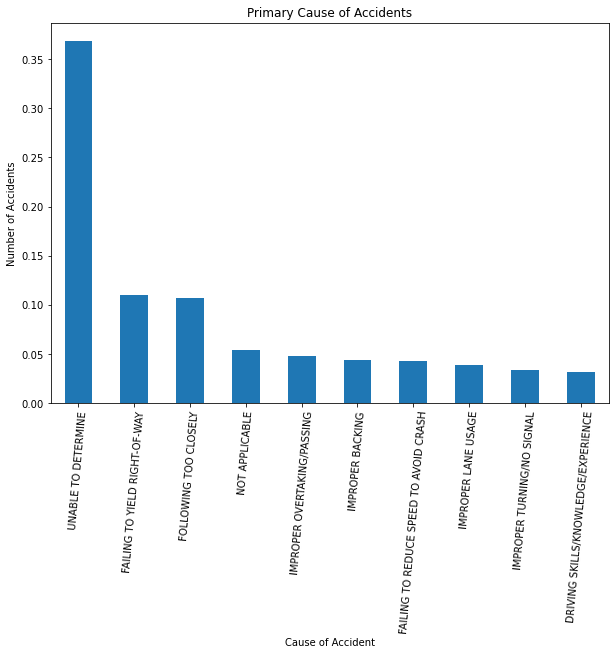

In [31]:
#bar plot of Primary contributory cause
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True).head(10).plot(kind = 'bar', figsize = (10,7))
plt.title('Primary Cause of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=85)


**Primary cause  of most of the accidents is unable to determine.**

Binning the column CRASH_MONTH to seasons and added a 'SEASON' column to dataframe.

In [32]:
#binning the CRASH_MONTH
month_bins = [1,4,7,10,13]
label=('Winter','Spring','Summer','Fall')
month_binned = pd.cut(df['CRASH_MONTH'], month_bins, labels= label)
month_binned= month_binned.cat.as_unordered()
df['SEASON']= month_binned

In [33]:
df['SEASON'].value_counts()

Summer    131721
Spring    115098
Winter    100112
Fall       87164
Name: SEASON, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

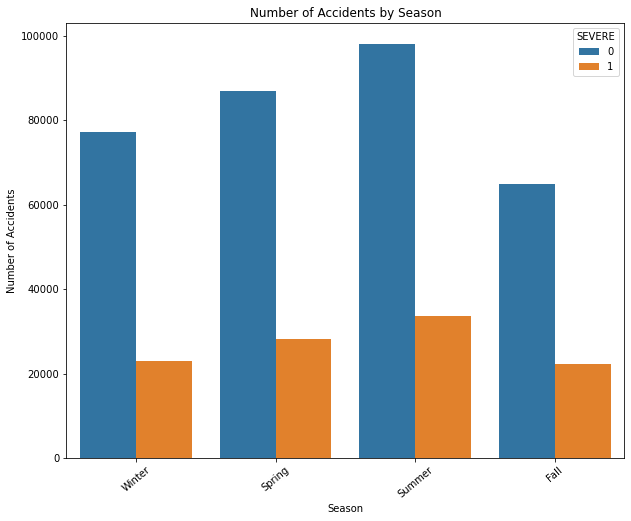

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x="SEASON", data=df, hue="SEVERE")
plt.title('Number of Accidents by Season')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40)

**Looking at the graph, most number of accidents occurred in summer**

([<matplotlib.axis.XTick at 0x2570b33a910>,
 [Text(0, 0, 'Sun'),
  Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thr'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat')])

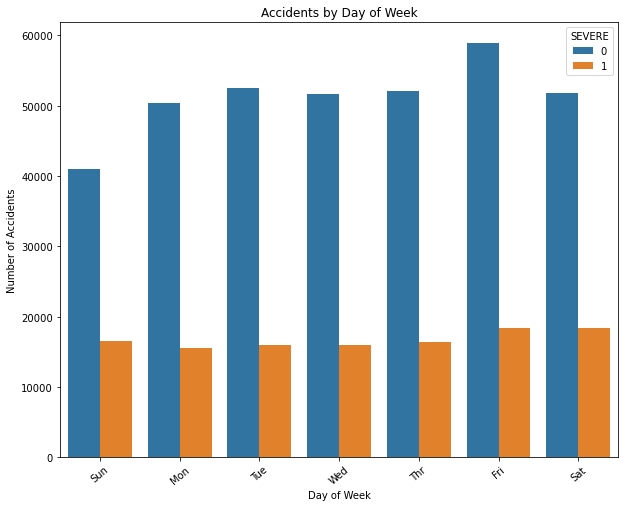

In [35]:
#counterplot of CRASH_DAY_OF_WEEK
plt.figure(figsize=(10,8))
sns.countplot(x= "CRASH_DAY_OF_WEEK" , data=df, 
              hue="SEVERE")
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(np.arange(7), ('Sun','Mon','Tue','Wed','Thr','Fri','Sat'), 
           rotation=40)

**It seems most accidents occurred on weekend mainly(Friday and Saturday).**

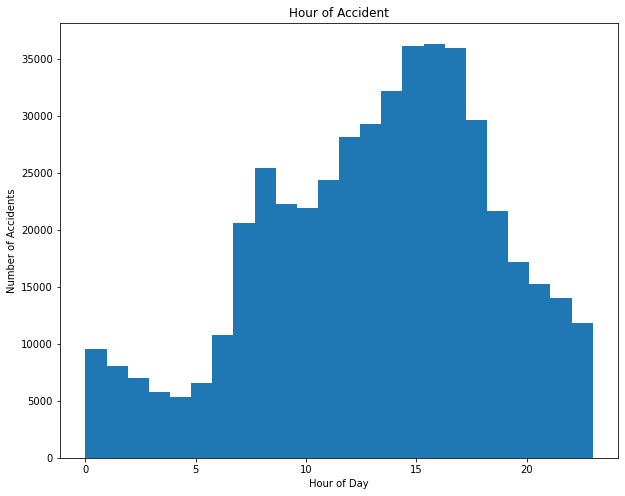

In [36]:
# CRASH_HOUR histogram plot
plt.figure(figsize=(10,8))
df['CRASH_HOUR'].plot(kind = 'hist', bins = 24)
plt.title('Hour of Accident')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

**Noticed increased number of the accidents in the rush hour.**

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

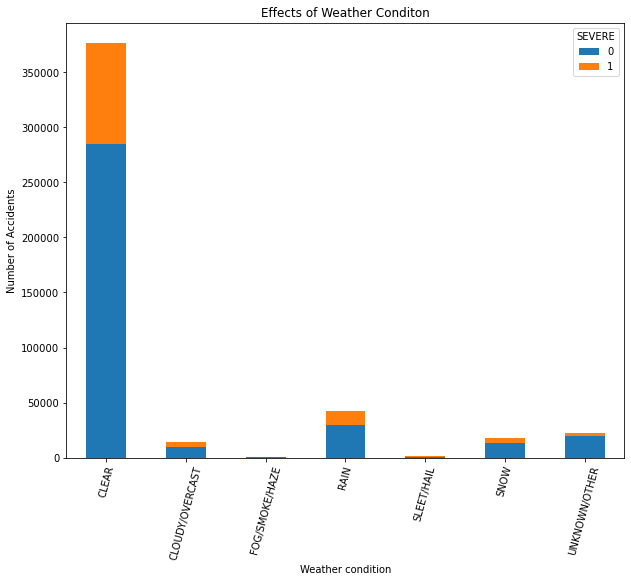

In [37]:
#bar plot of WEATHER_CONDITION
weather = df.groupby(['WEATHER_CONDITION', 'SEVERE'])['WEATHER_CONDITION'].count().unstack()
weather.plot( kind='bar', stacked=True, figsize =(10,8))
plt.title('Effects of Weather Conditon')
plt.xlabel('Weather condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)

**Most accidents occurred in a clear weather condition**

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

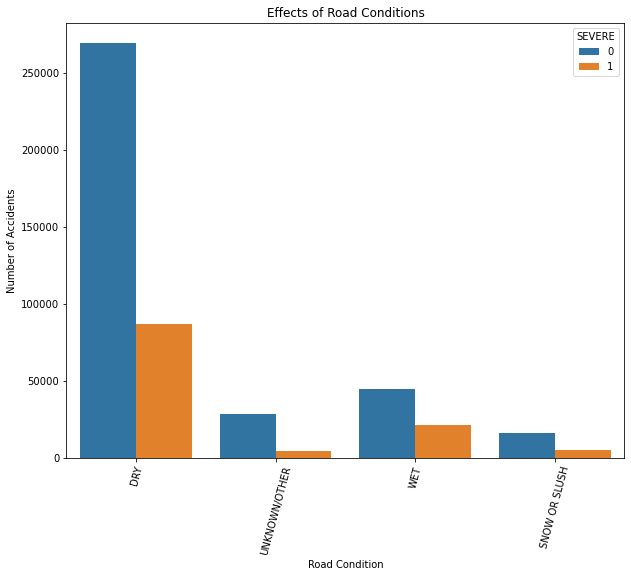

In [38]:
#counter plot of RAODWAY_SURFACE_COND
plt.figure(figsize=(10,8))
sns.countplot(x="ROADWAY_SURFACE_COND", data=df, hue="SEVERE")
plt.title('Effects of Road Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)

**Noticed most accidents happened in a DRY Road condition.**

**Counter plot of Damage cost**

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

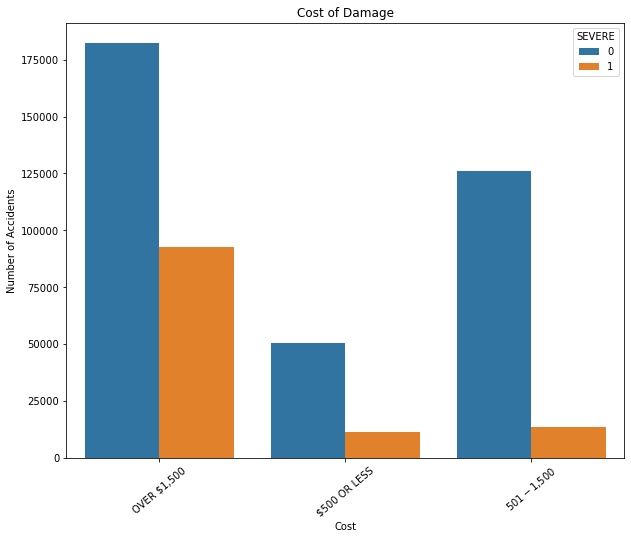

In [39]:
#counter plot of DAMAGE
plt.figure(figsize=(10,8))
sns.countplot(x="DAMAGE", data=df, hue="SEVERE")
plt.title('Cost of Damage')
plt.xlabel('Cost')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40)

**Large number of accidents as damage over $1500.**

**Creating the dummies for categorical columns**

In [40]:
#creating the dummies
dummies=['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION', 'WEATHER_CONDITION', 
         'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE' , 'TRAFFICWAY_TYPE', 
         'ROADWAY_SURFACE_COND', 'ALIGNMENT','SEASON',
         'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE']
df =  pd.get_dummies(df, columns = dummies, drop_first = True )

In [41]:
#printing the dataframe after the scrubbing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475553 entries, 0 to 475552
Columns: 136 entries, CRASH_DATE to PRIM_CONTRIBUTORY_CAUSE_WEATHER
dtypes: datetime64[ns](1), float64(7), int64(10), uint8(118)
memory usage: 118.8 MB


In [42]:
#saving and converting the cleaned dataframe to csv file
df.to_csv('carcrash_cleaned_data')